In [2]:
import os
import nibabel as nib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
def get_scan_properties(path):
    img = nib.load(path)
    shape = img.shape
    spacing = img.header.get_zooms()
    physical_size = tuple(s * sp for s, sp in zip(shape, spacing))
    return (shape, spacing, physical_size)

In [4]:
data_path = "D:/Git projects/CourseProjectYear4/segmentation_of_lung_CT_scans/data/" #python notebook works funcky with os paths

dir_paths = [
    "luna16_converted",
    "vessel12_converted",
    "MMWHS_data/all_scans"
]

metrics = [
    "shape_x",
    "shape_y",
    "shape_z",
    "spacing_x",
    "spacing_y",
    "spacing_z",
    "phys_size_x_mm",
    "phys_size_y_mm",
    "phys_size_z_mm"
]

pseudo_dataframe = []

for dir_path in dir_paths:
    full_folder_path = data_path + dir_path
    for root, _, files in os.walk(full_folder_path):
        for fname in files:
            if fname.endswith(".nii.gz"):
                path = os.path.join(root, fname)
                shape, spacing, physical_size = get_scan_properties(path)
                pseudo_dataframe.append({
                    "data_group": dir_path,
                    "filename": fname,
                    "shape_x": shape[0],
                    "shape_y": shape[1],
                    "shape_z": shape[2],
                    "spacing_x": spacing[0],
                    "spacing_y": spacing[1],
                    "spacing_z": spacing[2],
                    "phys_size_x_mm": physical_size[0],
                    "phys_size_y_mm": physical_size[1],
                    "phys_size_z_mm": physical_size[2],
                })

In [5]:
scans_properties = pd.DataFrame(pseudo_dataframe)
scans_properties.head()

,data_group,filename,shape_x,shape_y,shape_z,spacing_x,spacing_y,spacing_z,phys_size_x_mm,phys_size_y_mm,phys_size_z_mm
0,luna16_converted,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,512,512,194,0.644531,0.644531,1.800,330.000000,330.000000,349.199991
1,luna16_converted,1.3.6.1.4.1.14519.5.2.1.6279.6001.100332161840...,512,512,481,0.703125,0.703125,0.625,360.000000,360.000000,300.625000
2,luna16_converted,1.3.6.1.4.1.14519.5.2.1.6279.6001.100398138793...,512,512,157,0.625000,0.625000,1.800,320.000000,320.000000,282.599993
3,luna16_converted,1.3.6.1.4.1.14519.5.2.1.6279.6001.100530488926...,512,512,471,0.664062,0.664062,0.625,339.999756,339.999756,294.375000
4,luna16_converted,1.3.6.1.4.1.14519.5.2.1.6279.6001.100620385482...,512,512,126,0.664062,0.664062,2.500,339.999756,339.999756,315.000000


In [9]:
def plot_histogram(data, metric):
    plt.figure(figsize=(8, 5))
    sns.histplot(data=data, x=metric, hue="data_group", bins=20, multiple="layer")
    plt.title(f"Histogram of {metric} by dataset")
    plt.xlabel(metric)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

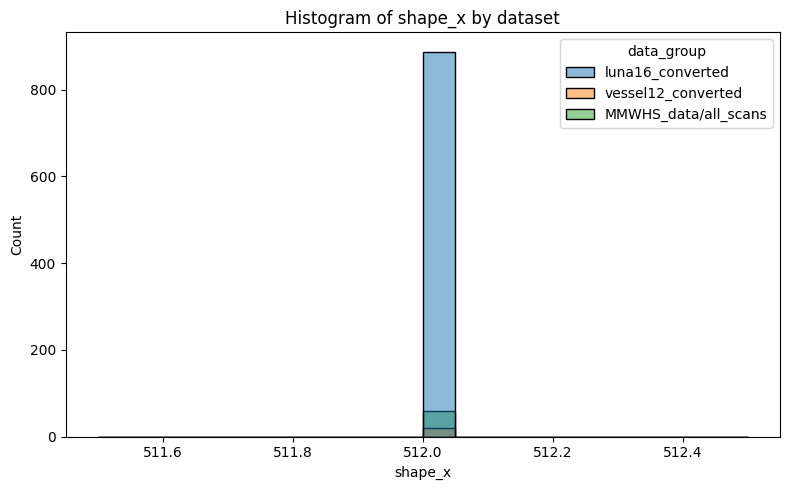

In [10]:
plot_histogram(scans_properties, "shape_x")

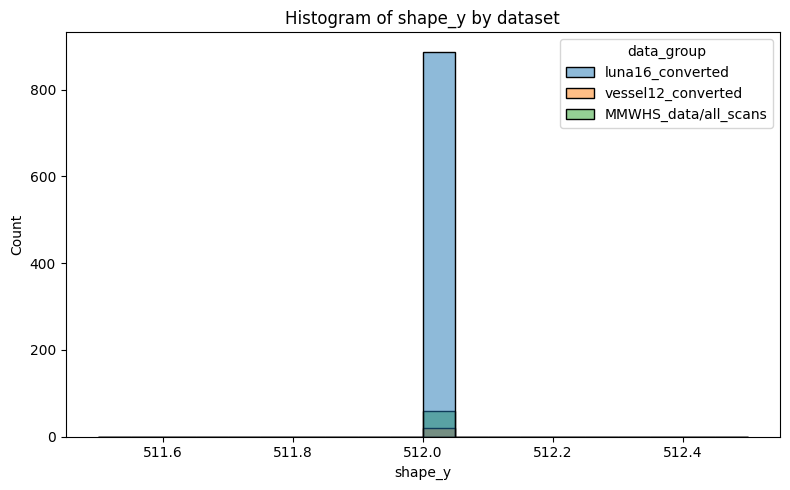

In [11]:
plot_histogram(scans_properties, "shape_y")

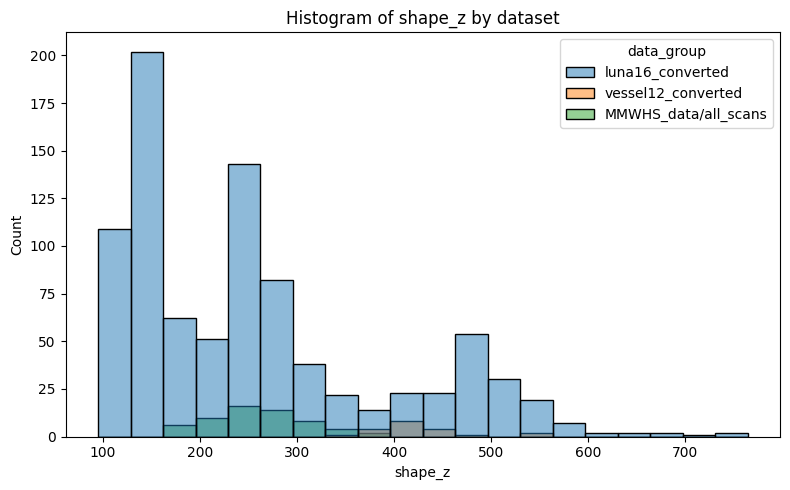

In [12]:
plot_histogram(scans_properties, "shape_z")

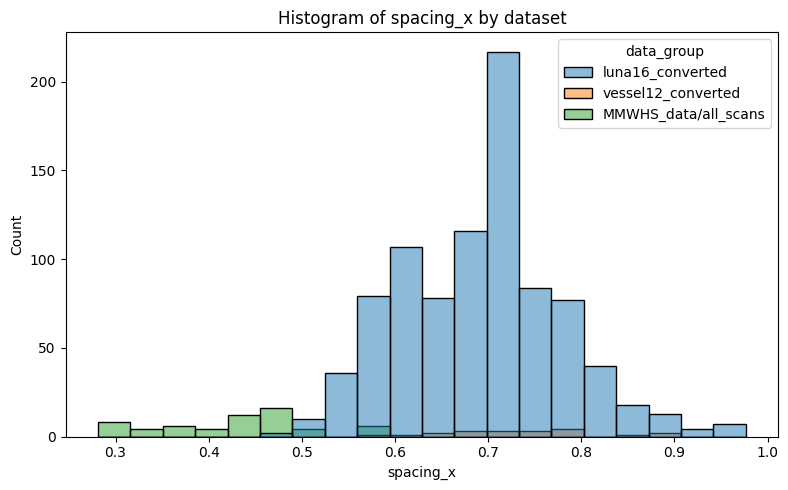

In [13]:
plot_histogram(scans_properties, "spacing_x")

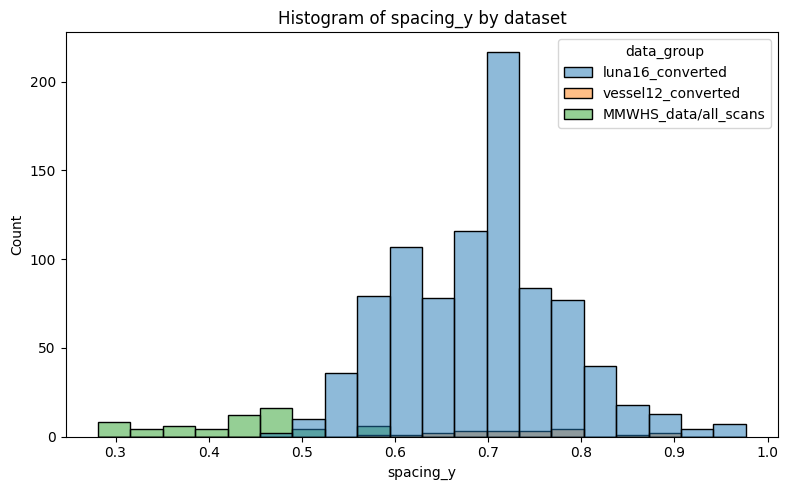

In [14]:
plot_histogram(scans_properties, "spacing_y")

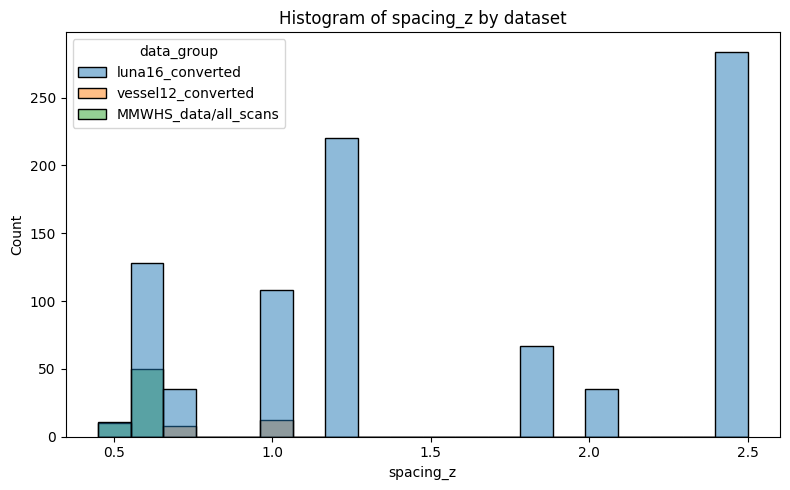

In [15]:
plot_histogram(scans_properties, "spacing_z")

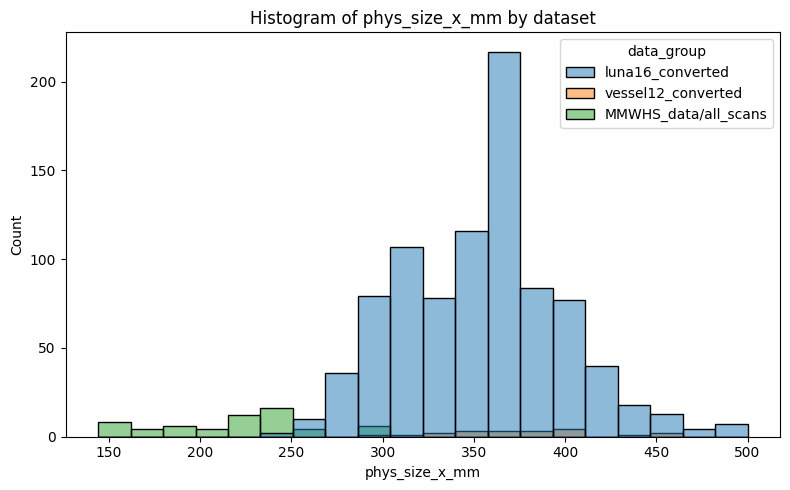

In [16]:
plot_histogram(scans_properties, "phys_size_x_mm")

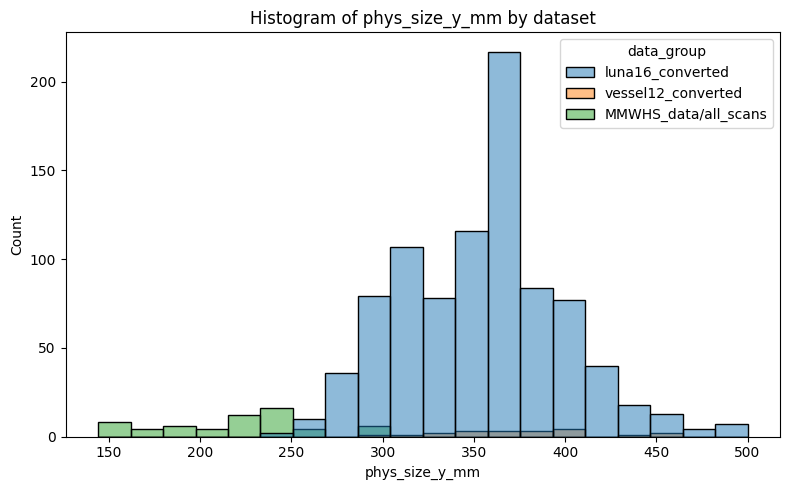

In [17]:
plot_histogram(scans_properties, "phys_size_y_mm")

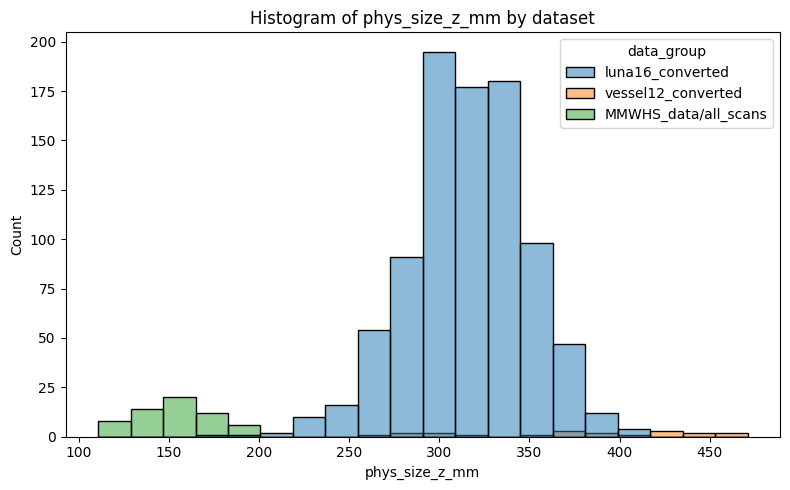

In [18]:
plot_histogram(scans_properties, "phys_size_z_mm")

In [19]:
scans_properties.describe()

,shape_x,shape_y,shape_z,spacing_x,spacing_y,spacing_z,phys_size_x_mm,phys_size_y_mm,phys_size_z_mm
count,968.0,968.0,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000
mean,512.0,512.0,259.700413,0.674671,0.674671,1.494938,345.431716,345.431716,307.081213
std,0.0,0.0,131.179973,0.104781,0.104781,0.739035,53.647908,53.647908,52.379147
min,512.0,512.0,95.000000,0.281250,0.281250,0.450000,144.000000,144.000000,110.625000
25%,512.0,512.0,140.000000,0.623047,0.623047,0.937500,319.000000,319.000000,292.500000
50%,512.0,512.0,240.000000,0.688250,0.688250,1.250000,352.384003,352.384003,315.000000
75%,512.0,512.0,310.500000,0.742188,0.742188,2.500000,380.000000,380.000000,333.750000
max,512.0,512.0,764.000000,0.976562,0.976562,2.500000,499.999756,499.999756,471.000000
